In [1]:
import numpy as np
import matplotlib.pyplot as plt
from vtl.Readfile import Readfile
from spec_id import Galaxy_ids, Gen_spec
import pandas as pd
from glob import glob
from astropy.io import fits, ascii
from astropy.table import Table
from scipy.interpolate import interp1d
import os
import cPickle
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

In [23]:
gids=Galaxy_ids('masslist_mar22.dat')

In [2]:
# goods_s=Table.read('/Users/Vince.ec/Clear_data/goodss_mosaic/goodss_3dhst.v4.3.cat',format='ascii')
# goods_n=Table.read('/Users/Vince.ec/Clear_data/goodsn_mosaic/goodsn_3dhstP.cat',format='ascii')
# 
goods_s=Table.read('/Users/vestrada/Desktop/catalogs_for_CLEAR/goodss_3dhst.v4.1.cats/Catalog/goodss_3dhst.v4.1.cat',format='ascii')
goods_n=Table.read('/Users/vestrada/Desktop/catalogs_for_CLEAR/goodsn_3dhst.v4.1.cats/Catalog/goodsn_3dhst.v4.1.cat',format='ascii')

goods_ez = Table.read('/Users/vestrada/Desktop/catalogs_for_CLEAR/goodss_3dhst.v4.1.cats/Eazy/goodss_3dhst.v4.1.zout',
                   format = 'ascii')
goodn_ez = Table.read('/Users/vestrada/Desktop/catalogs_for_CLEAR/goodsn_3dhst.v4.1.cats/Eazy/goodsn_3dhst.v4.1.zout',
                   format = 'ascii')

# restc_s=Table.read('/Users/Vince.ec/catalogs_for_CLEAR/goodss_3dhst.v4.1.cats/RF_colors/goodss_3dhst.v4.1.master.RF',format='ascii')
# restc_n=Table.read('/Users/Vince.ec/catalogs_for_CLEAR/goodsn_3dhst.v4.1.cats/RF_colors/goodsn_3dhst.v4.1.master.RF',format='ascii')
# 
# restc_s=Table.read('/Users/vestrada/Desktop/catalogs_for_CLEAR/goodss_3dhst.v4.1.cats/RF_colors/goodss_3dhst.v4.1.master.RF',format='ascii')
# restc_n=Table.read('/Users/vestrada/Desktop/catalogs_for_CLEAR/goodsn_3dhst.v4.1.cats/RF_colors/goodsn_3dhst.v4.1.master.RF',format='ascii')

In [24]:
fast_s=Table.read('/Users/vestrada/Desktop/catalogs_for_CLEAR/goodss_3dhst.v4.1.cats/Fast/goodss_3dhst.v4.1.fout',format='ascii')
fast_n=Table.read('/Users/vestrada/Desktop/catalogs_for_CLEAR/goodsn_3dhst.v4.1.cats/Fast/goodsn_3dhst.v4.1.fout',format='ascii')

# fast_s=Table.read('/Users/Vince.ec/catalogs_for_CLEAR/goodss_3dhst.v4.1.cats/Fast/goodss_3dhst.v4.1.fout',format='ascii')
# fast_n=Table.read('/Users/Vince.ec/catalogs_for_CLEAR/goodsn_3dhst.v4.1.cats/Fast/goodsn_3dhst.v4.1.fout',format='ascii')

In [3]:
goods_s.columns

TableColumns([('id', <Column name='id' dtype='int64' length=50507>
                   1
                   2
                   3
                   4
                   5
                   6
                   7
                   8
                   9
                  10
                  11
                  12
                 ...
               50496
               50497
               50498
               50499
               50500
               50501
               50502
               50503
               50504
               50505
               50506
               50507), ('x', <Column name='x' dtype='float64' length=50507>
               11876.639
               12056.715
               11351.875
               11415.681
                11385.57
               12005.665
               11508.163
               11710.638
               11952.919
               11938.062
               12056.616
               11984.414
                     ...
                9172.258
   

In [6]:
print 25-2.5*np.log10(goods_s['f_J'][39169])
print 25-2.5*np.log10(goods_n['f_J'][21155])

20.4586182662
20.8053475342


In [9]:
IDS=[]
IDN=[]

for i in range(len(restc_s['id'])):
    if 1 <= restc_s['z'][i] <= 1.8 and goods_s['class_star'][i]<0.8 and fast_s['lmass'][i] >= 10:
        IDS.append(i)


for i in range(len(restc_n['id'])):
    if 1 <= restc_n['z'][i] <= 1.8 and goods_n['class_star'][i]<0.8 and fast_n['lmass'][i] >= 10:
        IDN.append(i)

In [11]:
def Mag(band):
    magnitude=25-2.5*np.log10(band)
    return magnitude

uvS=Mag(restc_s['L153'][IDS]) - Mag(restc_s['L155'][IDS])
vjS=Mag(restc_s['L155'][IDS]) - Mag(restc_s['L161'][IDS])
uvN=Mag(restc_n['L153'][IDN]) - Mag(restc_n['L155'][IDN])
vjN=Mag(restc_n['L155'][IDN]) - Mag(restc_n['L161'][IDN])


IDSQ=[]
IDSsf=[]

IDNQ=[]
IDNsf=[]

for i in range(len(uvS)):
    if uvS[i]>=0.88*vjS[i]+0.59 and uvS[i]>1.382 and vjS[i]<1.65:
        IDSQ.append(i)
    if uvS[i]<0.88*vjS[i]+0.59:
        IDSsf.append(i)
        
for i in range(len(uvN)):
    if uvN[i]>=0.88*vjN[i]+0.59 and uvN[i]>1.382 and vjN[i]<1.65:
        IDNQ.append(i)
    if uvN[i]<0.88*vjN[i]+0.59:
        IDNsf.append(i)

In [12]:
urest=np.zeros(len(ids))
vrest=np.zeros(len(ids))
jrest=np.zeros(len(ids))

for i in range(len(ids)):
    if ids[i][0] == 's': 
        urest[i] =  restc_s['L153'][int(ids[i][1:])-1]
        vrest[i] =  restc_s['L155'][int(ids[i][1:])-1]
        jrest[i] =  restc_s['L161'][int(ids[i][1:])-1]
    if ids[i][0] == 'n': 
        urest[i] =  restc_n['L153'][int(ids[i][1:])-1]
        vrest[i] =  restc_n['L155'][int(ids[i][1:])-1]
        jrest[i] =  restc_n['L161'][int(ids[i][1:])-1]

uvQ=Mag(urest) - Mag(vrest)
vjQ=Mag(vrest) - Mag(jrest)

In [17]:
idS=['s' + str(U) for U in goods_s['id'][IDS]]
idN=['n' + str(U) for U in goods_n['id'][IDN]]

idall = np.append(idN,idS)

In [20]:
raall = np.append(goods_n['ra'][IDN],goods_s['ra'][IDS])
decall = np.append(goods_n['dec'][IDN],goods_s['dec'][IDS])

In [35]:
uvall = np.append(uvN,uvS)
vjall = np.append(vjN,vjS)

qsflag = np.repeat('s',repeats=len(uvall))

for i in range(len(uvall)):
    if uvall[i]>=0.88*vjall[i]+0.59 and uvall[i]>1.382 and vjall[i]<1.65:
        qsflag[i] = 'q'

In [36]:
print len(qsflag)

1300


In [27]:
insamp = []

for i in range(len(idall)):
    insamp.append(idall[i] in gids.ids)

In [37]:
uvj_db = pd.DataFrame({'ra' : raall, 'dec' : decall, '(U-V)' : uvall, '(V-J)' : vjall, 'Q/S' : qsflag, 'IN_SAMP' : insamp},index=idall)

In [38]:
uvj_db.to_pickle('uvj_db.pkl')

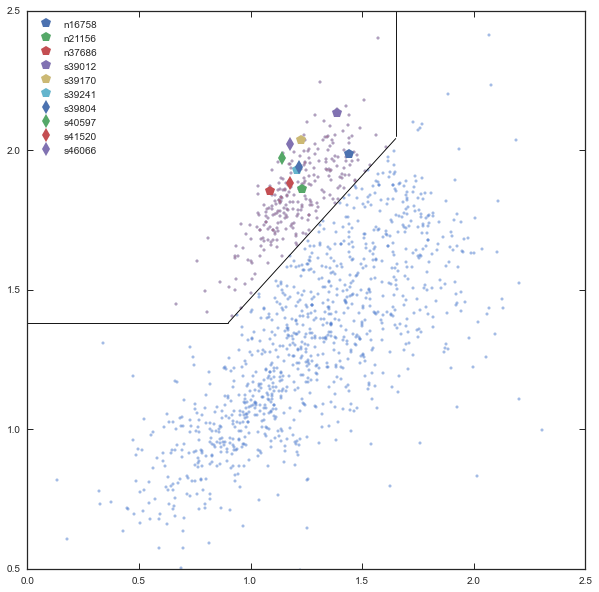

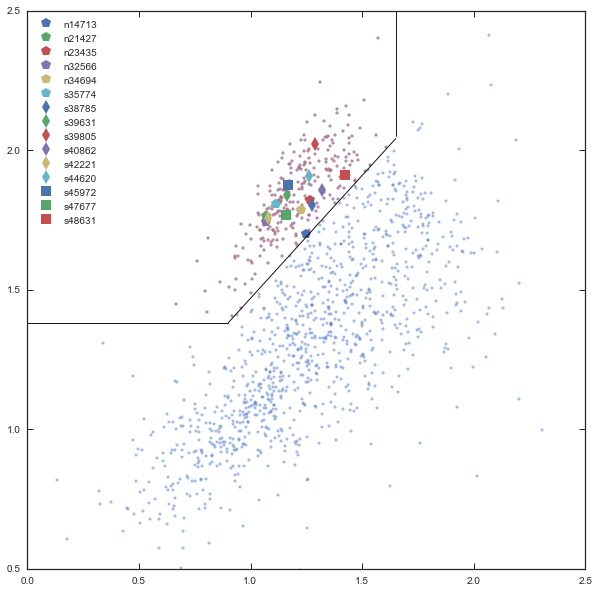

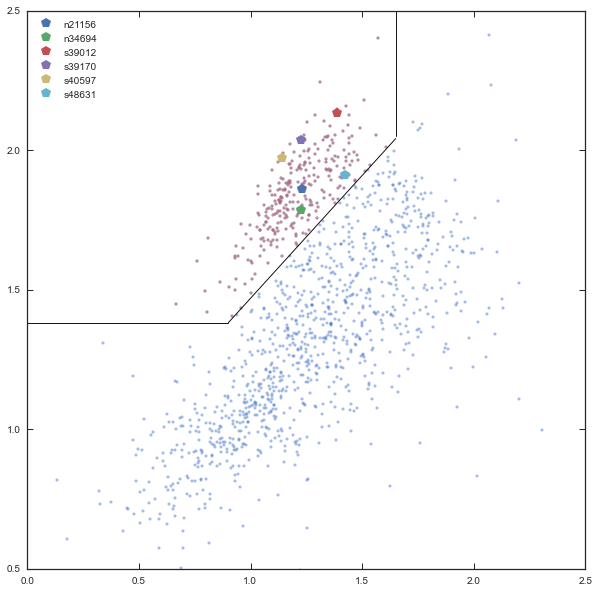

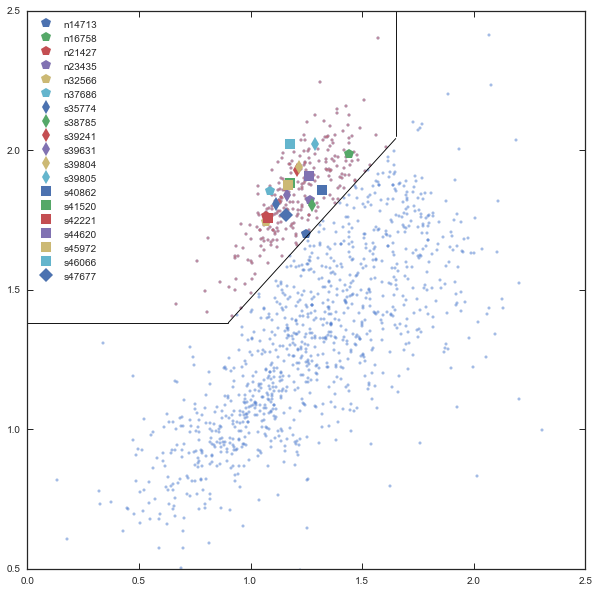

In [32]:
%matplotlib inline

points=['p','p','p','p','p','p','d','d','d','d','d','d','s','s','s','s','s','s','D']

plt.figure(figsize=[10,10])
plt.plot(vjS,uvS,'o',color=sea.color_palette('muted')[0], alpha=.5,ms=3)
plt.plot(vjN,uvN,'o',color=sea.color_palette('muted')[0], alpha=.5,ms=3)
plt.plot(vjS[IDSQ],uvS[IDSQ],'o',color=sea.color_palette('muted')[2], alpha=.3,ms=3)
plt.plot(vjN[IDNQ],uvN[IDNQ],'o',color=sea.color_palette('muted')[2], alpha=.3,ms=3)
for i in range(len(IDc)):
    plt.plot(vjQ[IDc][i],uvQ[IDc][i],points[i],ms=10,label=ids[IDc][i])
plt.plot([0,.9],[1.382,1.382],'k',lw=.9)
plt.plot([1.65,1.65],[2.05,2.5],'k',lw=.9)
plt.plot([.9,1.65],[0.88*.9+0.59,0.88*1.65+0.59],'k',lw=.9)
plt.axis([0,2.5,.5,2.5])
plt.legend(loc=2)
plt.show()
plt.close()

plt.figure(figsize=[10,10])
plt.plot(vjS,uvS,'o',color=sea.color_palette('muted')[0], alpha=.5,ms=3)
plt.plot(vjN,uvN,'o',color=sea.color_palette('muted')[0], alpha=.5,ms=3)
plt.plot(vjS[IDSQ],uvS[IDSQ],'o',color=sea.color_palette('muted')[2], alpha=.5,ms=3)
plt.plot(vjN[IDNQ],uvN[IDNQ],'o',color=sea.color_palette('muted')[2], alpha=.5,ms=3)
for i in range(len(IDd)):
    plt.plot(vjQ[IDd][i],uvQ[IDd][i],points[i],ms=10,label=ids[IDd][i])
plt.plot([0,.9],[1.382,1.382],'k',lw=.9)
plt.plot([1.65,1.65],[2.05,2.5],'k',lw=.9)
plt.plot([.9,1.65],[0.88*.9+0.59,0.88*1.65+0.59],'k',lw=.9)
plt.axis([0,2.5,.5,2.5])
plt.legend(loc=2)
plt.show()
plt.close()
# 
plt.figure(figsize=[10,10])
plt.plot(vjS,uvS,'o',color=sea.color_palette('muted')[0], alpha=.5,ms=3)
plt.plot(vjN,uvN,'o',color=sea.color_palette('muted')[0], alpha=.5,ms=3)
plt.plot(vjS[IDSQ],uvS[IDSQ],'o',color=sea.color_palette('muted')[2], alpha=.5,ms=3)
plt.plot(vjN[IDNQ],uvN[IDNQ],'o',color=sea.color_palette('muted')[2], alpha=.5,ms=3)
for i in range(len(IDmH)):
    plt.plot(vjQ[IDmH][i],uvQ[IDmH][i],points[i],ms=10,label=ids[IDmH][i])
plt.plot([0,.9],[1.382,1.382],'k',lw=.9)
plt.plot([1.65,1.65],[2.05,2.5],'k',lw=.9)
plt.plot([.9,1.65],[0.88*.9+0.59,0.88*1.65+0.59],'k',lw=.9)
plt.axis([0,2.5,.5,2.5])
plt.legend(loc=2)
plt.show()
plt.close()
# 
plt.figure(figsize=[10,10])
plt.plot(vjS,uvS,'o',color=sea.color_palette('muted')[0], alpha=.5,ms=3)
plt.plot(vjN,uvN,'o',color=sea.color_palette('muted')[0], alpha=.5,ms=3)
plt.plot(vjS[IDSQ],uvS[IDSQ],'o',color=sea.color_palette('muted')[2], alpha=.5,ms=3)
plt.plot(vjN[IDNQ],uvN[IDNQ],'o',color=sea.color_palette('muted')[2], alpha=.5,ms=3)
for i in range(len(IDmL)):
    plt.plot(vjQ[IDmL][i],uvQ[IDmL][i],points[i],ms=10,label=ids[IDmL][i])
plt.plot([0,.9],[1.382,1.382],'k',lw=.9)
plt.plot([1.65,1.65],[2.05,2.5],'k',lw=.9)
plt.plot([.9,1.65],[0.88*.9+0.59,0.88*1.65+0.59],'k',lw=.9)
plt.axis([0,2.5,.5,2.5])
plt.legend(loc=2)
plt.show()
plt.close()

In [11]:
uvjDB = pd.read_pickle('../data/uvj_db.pkl')
allDB = pd.read_pickle('../data/good_spec_gal_DB.pkl')
galDB = pd.read_pickle('../data/sgal_param_DB.pkl')
galDB = galDB.query('ids != 14713 and ids != 38126 and ids != 48631')

In [13]:
photz = []

for i in allDB.index:
    if allDB['gids'][i][0] == 's':
        photz.append(goods_ez['z_m1'][int(allDB['gids'][i][1:])-1])

        
    if allDB['gids'][i][0] == 'n':
        photz.append(goodn_ez['z_m1'][int(allDB['gids'][i][1:])-1])



In [16]:
allDB['low_res_specz'] = np.round(photz,2)

In [17]:
redDB = allDB[allDB.agn == False][allDB.in_data == True]#[allDB.low_res_specz > 1]

In [20]:
redDB

,gids,ids,redshift,hmag,ra,dec,agn,in_data,spec,flt_files,flt_xpos,flt_ypos,low_res_specz,hi_res_specz
43,n14713,14713,1.134,22.557517,189.236333,62.214608,False,True,True,../../../Clear_data/flt_files/icat12tqq_flt.fits,480.823147,636.879341,1.13,1.232
47,n15616,15616,1.250,23.162718,189.238403,62.218809,False,True,True,../../../Clear_data/flt_files/icat12tqq_flt.fits,557.760340,731.676403,1.25,0.787
49,n16758,16758,0.992,21.618617,189.162357,62.224840,False,True,True,../../../Clear_data/flt_files/icxt36jqq_flt.fits,103.350402,901.345306,0.99,1.014
50,n17070,17070,1.226,21.592234,189.268086,62.226445,False,True,True,../../../Clear_data/flt_files/icat25hcq_flt.fits,637.268350,823.317758,1.23,1.192
51,n17436,17436,0.869,22.379914,189.171078,62.227726,False,True,True,../../../Clear_data/flt_files/icxt36jmq_flt.fits,20.935569,1013.208080,0.87,0.903
58,n19442,19442,1.007,23.317546,189.123036,62.237460,False,True,True,../../../Clear_data/flt_files/icat03dzq_flt.fits,30.768618,1009.307349,1.01,1.101
61,n21156,21156,1.201,21.327907,189.239409,62.247548,False,True,True,../../../Clear_data/flt_files/icxt51jvq_flt.fits,279.865494,838.707094,1.20,1.251
62,n21427,21427,1.479,22.540644,189.368121,62.247344,False,True,True,../../../Clear_data/flt_files/icat26dyq_flt.fits,-19.664813,572.418137,1.48,1.514
68,n23254,23254,1.457,23.460559,189.349606,62.255761,False,True,True,../../../Clear_data/flt_files/icat26dyq_flt.fits,290.163896,661.958820,1.46,0.974
69,n23435,23435,1.092,22.902048,189.338306,62.256571,False,True,True,../../../Clear_data/flt_files/icat26dyq_flt.fits,422.330798,604.972381,1.09,1.134


In [21]:
in_samp = np.repeat('out', len(redDB.index))
uv = np.zeros(len(redDB.index))
vj = np.zeros(len(redDB.index))
hz = np.zeros(len(redDB.index))
lz = np.zeros(len(redDB.index))
for i in range(len(redDB.index)):
    if redDB.gids[redDB.index[i]] in galDB.gids.values:
        in_samp[i] = 'in'
    
    uv[i] = uvjDB['(U-V)'][redDB.gids[redDB.index[i]]]
    vj[i] = uvjDB['(V-J)'][redDB.gids[redDB.index[i]]]
    hz[i] = redDB['hi_res_specz'][redDB.index[i]]
    lz[i] = redDB['low_res_specz'][redDB.index[i]]


In [29]:
select_samp = pd.DataFrame({'gids' : redDB.gids, '(U-V)' : uv, '(V-J)' : vj, 'IN_SAMP' : in_samp, 'lmass' : lmass, 
                            'hi_res_specz' : hz, 'low_res_specz' : lz,'SN' : sn})

In [30]:
select_samp.to_pickle('../data/select_samp.pkl')

In [3]:
select_samp = pd.read_pickle('../data/select_samp.pkl')

In [25]:
lmass = np.zeros(len(redDB.index))

for i in range(len(select_samp.gids)):
    if select_samp.gids[select_samp.index[i]][0] == 's': 
        lmass[i] =  fast_s['lmass'][int(select_samp.gids[select_samp.index[i]][1:])-1]

    if select_samp.gids[select_samp.index[i]][0] == 'n': 
        lmass[i] =  fast_n['lmass'][int(select_samp.gids[select_samp.index[i]][1:])-1]



In [67]:
lmass

array([ 10.56,  10.83,  10.92,  10.1 ,  11.16,  10.73,  10.19,  10.27,
        10.61,  10.94,  10.89,  10.53,  10.11,  10.55,  10.08,  10.51,
        10.39,  10.86,  10.88,  11.09,  11.09,  10.87,  10.69,  10.91,
        10.62,  10.66,  10.59,  11.01,  10.76,  10.92,  11.08,  10.92,
        10.3 ,  10.11,  10.69,  11.02,  10.5 ,  10.87,  10.85,  10.16,
        10.09,  11.01])

In [27]:
def SNR(wave,flux,error):
    IDX = [U for U in range(len(wave)) if 8500 < wave[U] < 10500]

    fl = np.trapz(flux[IDX],wave[IDX])
    er = np.trapz(error[IDX],wave[IDX])
    return fl/er

In [28]:
sn = np.zeros(len(redDB.index))

for i in range(len(select_samp.gids)):
    spec = Gen_spec(select_samp.gids[select_samp.index[i]], select_samp.hi_res_specz[select_samp.index[i]])
    sn[i] = SNR(spec.gal_wv,spec.gal_fl,spec.gal_er)

No TEAL-based tasks available for this package!
../data/galaxy_flts/n14713_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/n14713_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/n14713_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/n14713_flt: save ../data/galaxy_flts/n14713_flt.detect_seg.fits, ../data/galaxy_flts/n14713_flt.detect.cat


../data/galaxy_flts/n15616_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/n15616_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/n15616_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/n15616_flt: save ../data/galaxy_flts/n15616_flt.detect_seg.fits, ../data/galaxy_flts/n15616_flt.detect.cat
../data/galaxy_flts/n16758_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/n16758_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/n16758_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/n16758_flt: save ../data/galaxy_flts/n16758_flt.detect_seg.fits, ../dat

/Users/vestrada/miniconda2/envs/astroconda/lib/python2.7/site-packages/grizli/model.py:1023: RuntimeWarning: invalid value encountered in less
  bad = self.data['SCI'] < sigma*self.data['ERR']


../data/galaxy_flts/s35774_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/s35774_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/s35774_flt: photutils.source_properties - 2 objects
../data/galaxy_flts/s35774_flt: save ../data/galaxy_flts/s35774_flt.detect_seg.fits, ../data/galaxy_flts/s35774_flt.detect.cat
../data/galaxy_flts/s38785_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/s38785_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/s38785_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/s38785_flt: save ../data/galaxy_flts/s38785_flt.detect_seg.fits, ../dat

In [77]:
sn

array([  2.76863639e+00,   1.05211580e+01,   1.25080909e-03,
         1.24024509e+00,   1.57399524e+01,   1.65553605e+00,
         1.23455634e+00,   3.31109176e+00,   6.03918203e+00,
         1.13982659e+01,   8.41730918e+00,   7.36176453e-01,
         9.56416790e-01,   3.94511665e+00,   1.64378330e+00,
         1.19100076e+00,   9.59026392e-01,   1.29290770e+01,
         7.07868652e+00,   1.44764707e+00,   2.22594037e+01,
         1.30496504e+01,   9.93174742e+00,   4.06477455e+00,
         3.59459796e+00,   1.93740109e+00,   8.48270003e+00,
         1.60740517e+01,   4.22124049e+00,   4.84240181e+00,
         2.07302404e+00,   3.04059988e+00,   1.06232991e+00,
         6.78843135e-01,   6.99982490e+00,   3.79616743e+00,
         4.52752169e+00,   1.31986035e+01,   2.90403067e+00,
         1.96857344e+00,   3.68898159e+00,   6.12649606e+00])